In [7]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

### LinearSVM with Polynomial Features

In [27]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
polynomial_svm_clf = make_pipeline(
	PolynomialFeatures(degree=3),
	StandardScaler(),
	LinearSVC(C=10, max_iter=10000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

,steps,"[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [28]:
import matplotlib.pyplot as plt


def plot_dataset(X, y, axes):
	plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
	plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
	plt.axis(axes)
	plt.grid(True)
	plt.xlabel("$x_1$")
	plt.ylabel("$x_2$", rotation=0)


def plot_predictions(clf, axes):
	x0s = np.linspace(axes[0], axes[1], 100)
	x1s = np.linspace(axes[2], axes[3], 100)
	x0, x1 = np.meshgrid(x0s, x1s)
	X = np.c_[x0.ravel(), x1.ravel()]
	y_pred = clf.predict(X).reshape(x0.shape)
	y_decision = clf.decision_function(X).reshape(x0.shape)
	plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
	plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

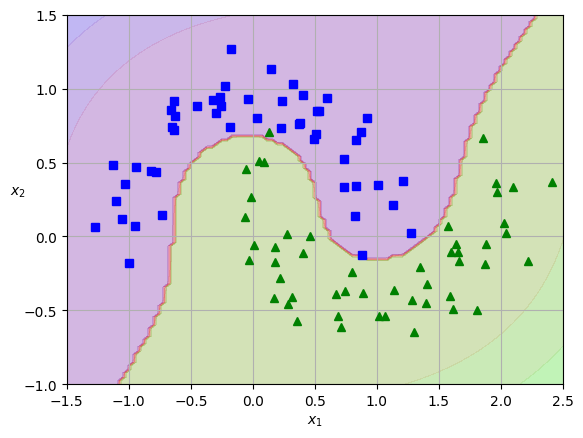

In [29]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### Polynomial Kernel

In [30]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(
	StandardScaler(),
	SVC(kernel="poly", degree=3, coef0=1, C=5)
)
poly_kernel_svm_clf.fit(X, y)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,3
,gamma,'scale'


In [31]:
poly100_kernel_svm_clf = make_pipeline(
	StandardScaler(),
	SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,10
,gamma,'scale'


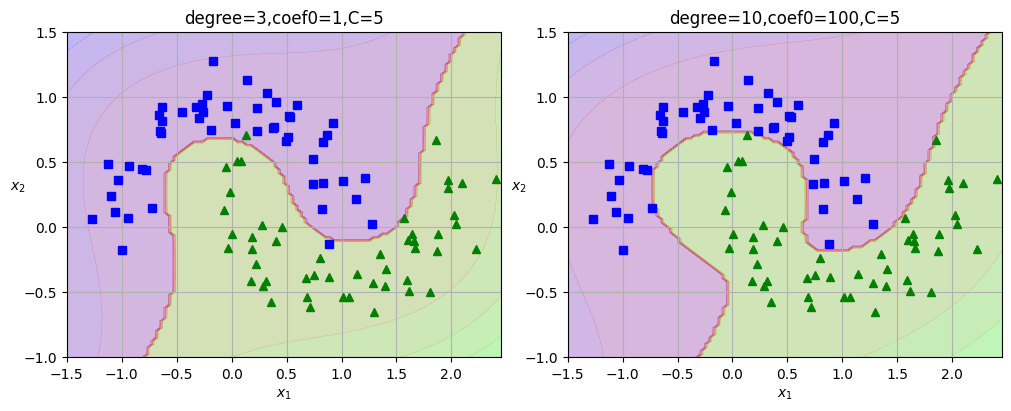

In [32]:
import matplotlib.axes._axes as axes
import matplotlib.figure as figure

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), layout='constrained')  # type:figure.Figure, axes.Axes
axes = [-1.5, 2.45, -1, 1.5]
plt.sca(ax[0])
plot_predictions(poly_kernel_svm_clf, axes)
plot_dataset(X, y, axes)
plt.title("degree=3,coef0=1,C=5")

plt.sca(ax[1])
plot_predictions(poly100_kernel_svm_clf, axes)
plot_dataset(X, y, axes)
plt.title("degree=10,coef0=100,C=5")
plt.show()

### Similarity Features

Another technique to tackle nonlinear problems is to add features computed using a similarity function, which measures how much each instance resembles a particular landmark

Gaussian RBF:

$$
\phi_{\gamma}(x,\ell)=\text{exp}(-\gamma||x-\ell||^2)
$$

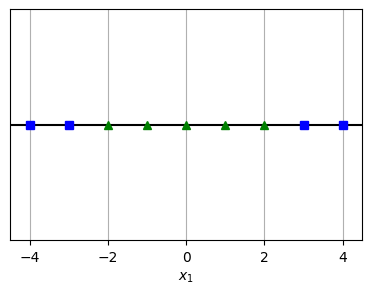

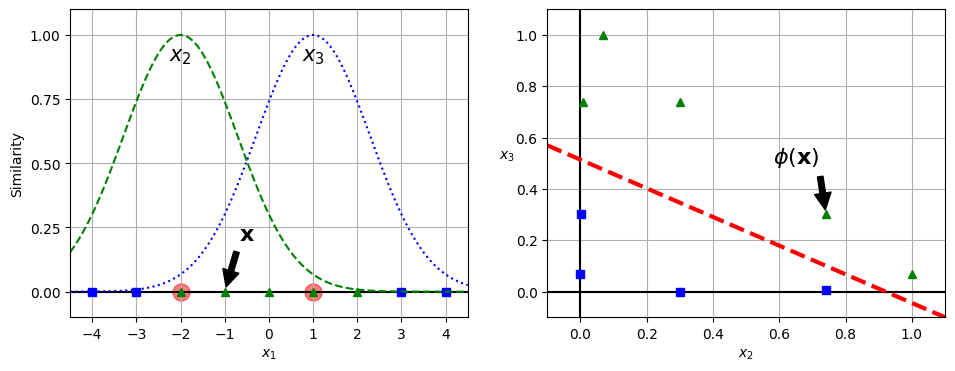

In [33]:
def gaussian_rbf(x, landmark, gamma):
	return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1) ** 2)


X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D ** 2]
ys = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][ys == 0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][ys == 1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])
plt.show()

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk == 0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk == 1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(
	r'$\mathbf{x}$',
	xy=(X1D[3, 0], 0),
	xytext=(-0.5, 0.20),
	ha="center",
	arrowprops=dict(facecolor='black', shrink=0.1),
	fontsize=16,
)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=15)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk == 0], XK[:, 1][yk == 0], "bs")
plt.plot(XK[:, 0][yk == 1], XK[:, 1][yk == 1], "g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.annotate(
	r'$\phi\left(\mathbf{x}\right)$',
	xy=(XK[3, 0], XK[3, 1]),
	xytext=(0.65, 0.50),
	ha="center",
	arrowprops=dict(facecolor='black', shrink=0.1),
	fontsize=16,
)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)
plt.show()

In [34]:
rbf_kernel_svm_clf = make_pipeline(
	StandardScaler(),
	SVC(kernel="rbf", gamma=5, C=0.001)
)
rbf_kernel_svm_clf.fit(X, y)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,0.001
,kernel,'rbf'
,degree,3
,gamma,5


$\gamma$ acts like regularization hyperparameter: if your model is overfitting, you should reduce it if it is underfitting you should increase it (similar to the C hyperparameter)


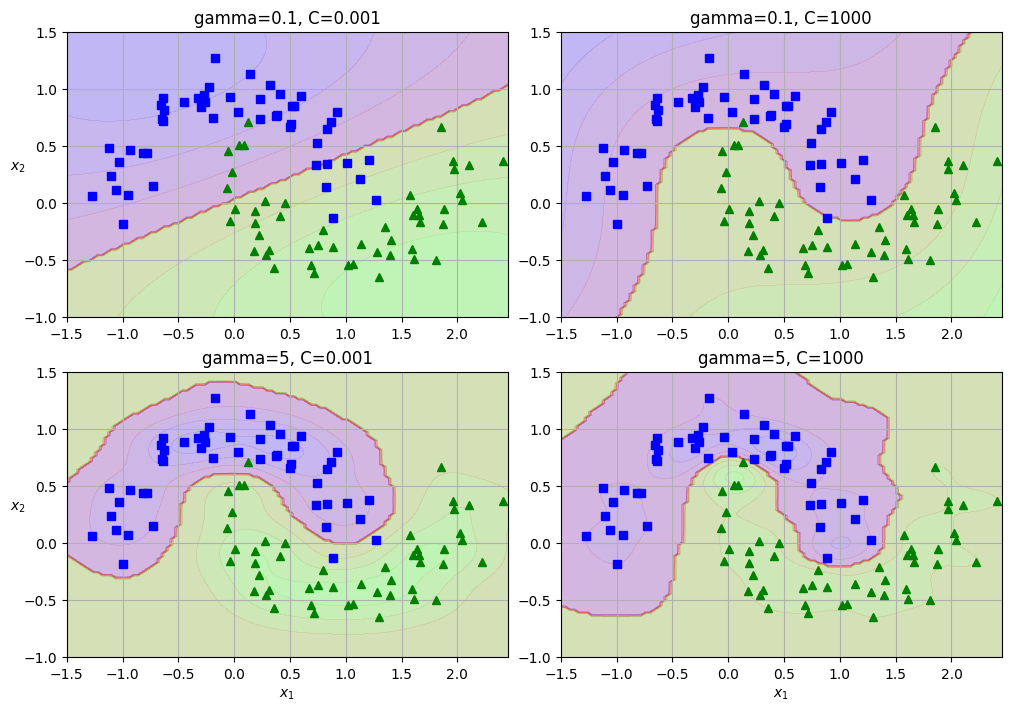

In [36]:
import matplotlib.axes._axes as axes
import matplotlib.figure as figure

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparameters = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clf = []
for gamma, C in hyperparameters:
	rbf_kernel_svm_clf = make_pipeline(
		StandardScaler(),
		SVC(kernel="rbf", gamma=gamma, C=C)
	)
	rbf_kernel_svm_clf.fit(X, y)
	svm_clf.append(rbf_kernel_svm_clf)

axes = [-1.5, 2.45, -1, 1.5]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), layout='constrained')  # type:figure.Figure, axes.Axes
for i, clf in enumerate(svm_clf):
	plt.sca(ax[i // 2, i % 2])
	plot_predictions(svm_clf[i], axes)
	plot_dataset(X, y, axes)
	gamma, C = hyperparameters[i]
	plt.title(f"gamma={gamma}, C={C}")
	if i in (0, 1):
		plt.xlabel("")
	if i in (1, 3):
		plt.ylabel("")

plt.show()

with so many kernels to choose from remember, as a rule of thumb, you should always try the linear kernel first (LinearSVC is much faster that SVC(kernel="linear")), especially if the training set is very large or if it has plenty of features. If the training set is not too large, you should also try the Gaussian RBF kernel; it works well in most cases. Then if you have spare time and computing power, you can experiment with a few other kernels, using cross-validation and grid search.